In [9]:
import numpy as np 

In [10]:
import pandas
import matplotlib.pyplot as plt 
%matplotlib inline 

In [11]:
df = pandas.read_csv( 'clean/thermal.csv' )
N220 = df[ ( df.mutant.str[0:4] == 'N220' ) ]

In [12]:
df = pandas.read_csv( '../data_set.csv', index_col=0 )
N220 = df[ ( df.index.str[0:4] == 'N220' ) ]

(0, 10)

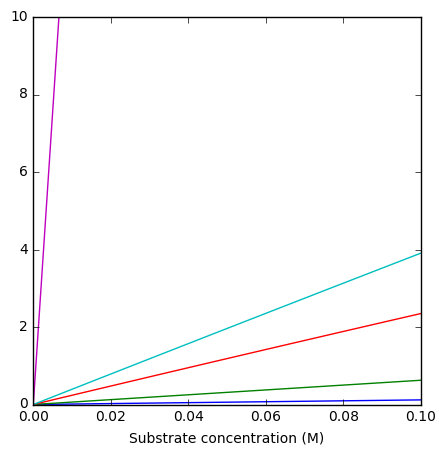

In [33]:
x_vals = np.linspace( 0, .75, 50 ) 
def f( x, kcat, km ):
    return x*kcat/(x+km) 

plt.figure( figsize=(5,5) ) 
plt.xlabel( 'Substrate concentration (M)' ) 
for idx, row in N220.iterrows():    
    plt.plot( x_vals, f(x_vals, row.kcat, row.km ) )
    #plt.text( .85, f(x_vals.max(), row.kcat, row.km), idx )
plt.xlim( ( 0, 0.1 ) )
plt.ylim( ( 0, 10 ) ) 

In [ ]:
df  
for idx, data in df.groupby( 'mutant' ):
    normalized_rates = data.rate / data.rate.max()
    plt.scatter( data.temp, normalized_rates, color='k' )
    x_vals = np.linspace( data.temp.min(), data.temp.max(), 50 )
    my_params = good_thermal_fits.loc[ idx ]
    plt.plot( x_vals, r( x_vals, my_params.tm, my_params.k ), color='red' )
    plt.legend( ['T$_m$ = {} ± {} ˚C'.format( my_params.tm.round(1), my_params.tm_std_err.round(1) )], loc=1 )
    plt.xlim( ( 28, 52 ) )
    plt.xticks( ( 30, 35, 40, 45, 50 ) ) 
    plt.xlabel( 'Incubation temperature (˚C)' )
    plt.yticks( ( 0, 0.25, .5, .75, 1 ) )
    plt.ylabel( 'Normalized product formation rate' ) 
    print( idx ) 
    #plt.title( idx ) 
    if '_' in idx:
        plt.title( idx.split( '_' )[0] )
    else:
        plt.title( idx )
    plt.show()